# Notebook para inspección visual de los datos
Para facilitar la interpretación se hace con el primer conjunto de datos que se obtuvo,
archivo: output_plotdata_HF_ccpvdz_continua.csv

In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import LeakyReLU
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.colors as colors
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split
from datetime import datetime


# Carga de datos

In [7]:
#Se carga el archivo
data0 = pd.read_csv("/content/drive/My Drive/Colab Notebooks/output_plotdata_HF_ccpvdz_continua.csv")

#Como la molécula es simétrica se simetrizan los datos repecto de los radios y después se eliminan duplicados
#Esto se hace porque si hay un dato para un rh1 y rh2 determinados, será la misma anergía si se cambia rh1 por rh2
#de este modo puede que consigamos un conjunto de datos mayor
dataA = data0.copy()
dataB = data0.copy()
dataB= dataB.rename(columns={"rh2": "rh1", "rh1": "rh2"})
data = pd.concat([dataA, dataB])
data = data.drop_duplicates()

#Se resetea el índice por que si se han incluido filas en el paso anterior, evitar indices duplicados
data = data.reset_index()
data = data.drop('index', axis='columns')

#Para facilitar la inspección del data_frame
data.sort_values(by=['ang', 'rh1', 'rh2'])

,rh1,rh2,ang,energia
count,8807.000000,8807.000000,8807.000000,8807.000000
mean,1.763108,1.763108,104.593108,-75.605256
std,0.577360,0.577360,5.929344,0.498599
min,0.800000,0.800000,94.500000,-76.027160
25%,1.308000,1.308000,99.500000,-75.944389
50%,1.808000,1.808000,105.500000,-75.857791
75%,2.308000,2.308000,109.500000,-75.404442
max,2.800000,2.800000,114.500000,-72.066162


# Estadísticos

In [13]:
data.describe()

,rh1,rh2,ang,energia
count,8807.000000,8807.000000,8807.000000,8807.000000
mean,1.763108,1.763108,104.593108,-75.605256
std,0.577360,0.577360,5.929344,0.498599
min,0.800000,0.800000,94.500000,-76.027160
25%,1.308000,1.308000,99.500000,-75.944389
50%,1.808000,1.808000,105.500000,-75.857791
75%,2.308000,2.308000,109.500000,-75.404442
max,2.800000,2.800000,114.500000,-72.066162


# Distribuciones

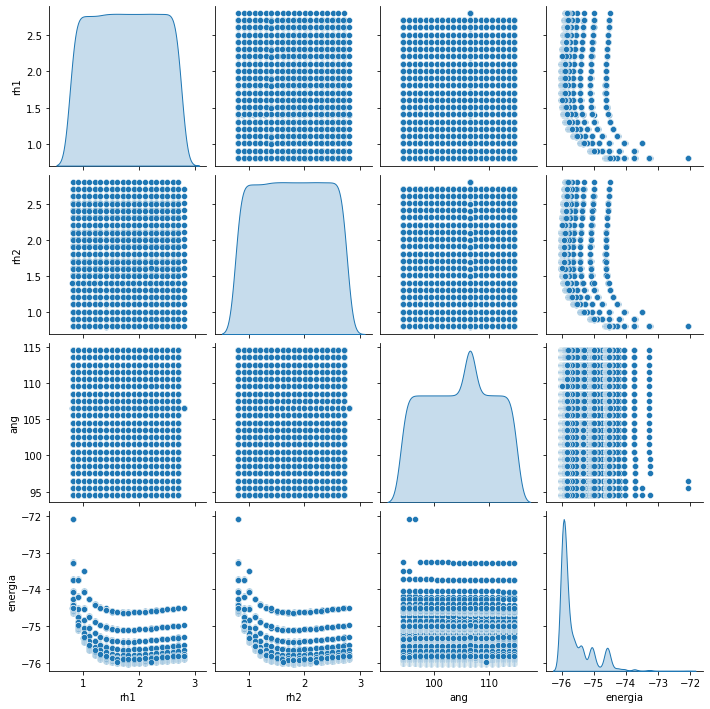

In [14]:
sns.pairplot(data[["rh1", "rh2", "ang", "energia"]], diag_kind="kde")
plt.show()

# Energía frente a una distancia de enlace y color codificado con la otra distancia de enlace
Se obtendría el mismo resultado permutando los enlaces ya que la molécula

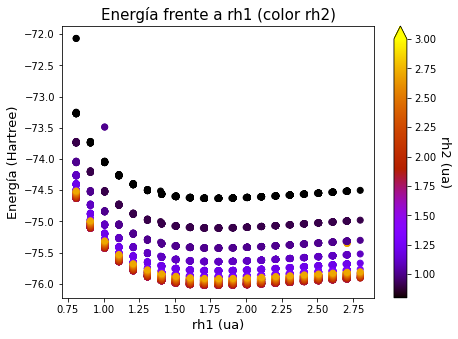

In [8]:
fig, ax = plt.subplots(figsize=(7,5))
colormap = plt.cm.gnuplot #or any other colormap
normalize = colors.Normalize(vmin=0.8, vmax=3.0)
pcm = ax.scatter(data0['rh1'], data0['energia'],c=data0['rh2'] , cmap=colormap, norm=normalize)

cbar = fig.colorbar(pcm, ax=ax, extend='max')
cbar.ax.set_ylabel('rh2 (ua)',rotation=270,labelpad=15, fontsize=13)
ax.set_title('Energía frente a rh1 (color rh2)', fontsize=15)
ax.set_xlabel('rh1 (ua)', fontsize=13)
ax.set_ylabel('Energía (Hartree)', fontsize=13)

plt.show()


# Energía frente a una distancia de enlace y color codificado con el ángulo
Se obtendría el mismo resultado permutando los enlaces ya que la molécula

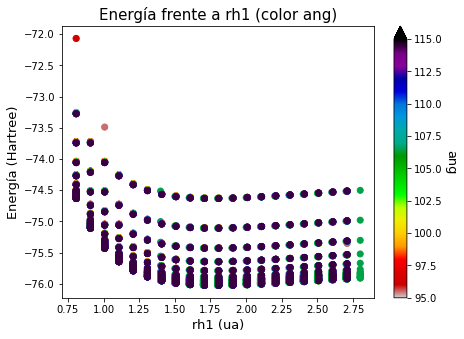

In [9]:
fig, ax = plt.subplots(figsize=(7,5))
colormap = plt.cm.nipy_spectral_r 
normalize = colors.Normalize(vmin=95, vmax=115)
pcm = ax.scatter(data0['rh1'], data0['energia'],c=data0['ang'], cmap=colormap, norm=normalize)
cbar = fig.colorbar(pcm, ax=ax, extend='max')
cbar.ax.set_ylabel('ang',rotation=270,labelpad=15, fontsize=13)
ax.set_title('Energía frente a rh1 (color ang)', fontsize=15)
ax.set_xlabel('rh1 (ua)', fontsize=13)
ax.set_ylabel('Energía (Hartree)', fontsize=13)
plt.show()

Ampliación de la zona del mínimo

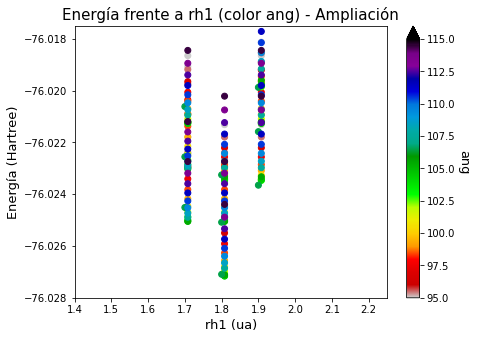

In [10]:
fig, ax = plt.subplots(figsize=(7,5))
colormap = plt.cm.nipy_spectral_r 
normalize = colors.Normalize(vmin=95, vmax=115)
pcm = ax.scatter(data0['rh1'], data0['energia'],c=data0['ang'], cmap=colormap, norm=normalize)

cbar = fig.colorbar(pcm, ax=ax, extend='max')
cbar.ax.set_ylabel('ang',rotation=270,labelpad=15, fontsize=13)
axes = plt.gca()
axes.set_xlim([1.4,2.25])
axes.set_ylim([-76.028,-76.0175])

ax.set_title('Energía frente a rh1 (color ang) - Ampliación', fontsize=15)
ax.set_xlabel('rh1 (ua)', fontsize=13)
ax.set_ylabel('Energía (Hartree)', fontsize=13)

plt.show()

# Energía frente a las dos distancias y al ángulo

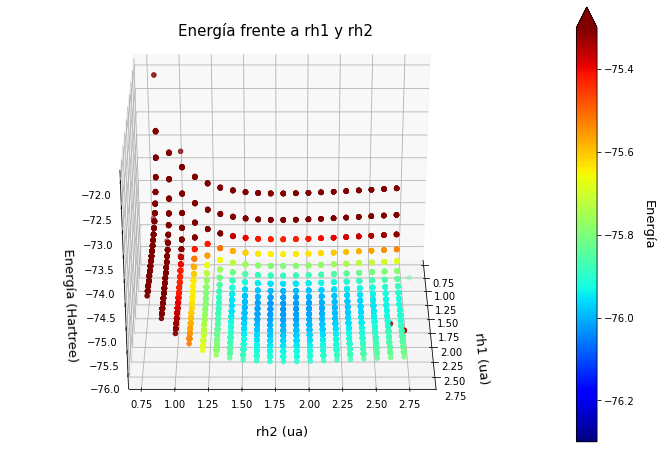

In [25]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111, projection='3d')

colormap = plt.cm.jet 
normalize = colors.Normalize(vmin=-76.3, vmax=-75.3)

pcm = ax.scatter(data0['rh1'], data0['rh2'], data0['energia'],c=data0['energia'], cmap=colormap, norm=normalize)
cbar = fig.colorbar(pcm, ax=ax, extend='max')
cbar.ax.set_ylabel('Energía',rotation=270,labelpad=20, fontsize=13)

ax.set_xlabel('rh1 (ua)',labelpad=25, fontsize=13)
ax.set_ylabel('rh2 (ua)',labelpad=10, fontsize=13)
ax.set_zlabel('Energía (Hartree)',labelpad=20, fontsize=13)
ax.set_title('Energía frente a rh1 y rh2', fontsize=15)
ax.tick_params(axis='x', which='major', pad=10)
ax.tick_params(axis='z', which='major', pad=10)
ax.tick_params(axis='y', which='major', pad=0)

ax.view_init(30, 0)


# Energía frente al ángulo con las distancias de enlace fijas a 1.808 ua
Distancias de enlace próximas al mínimo de energía

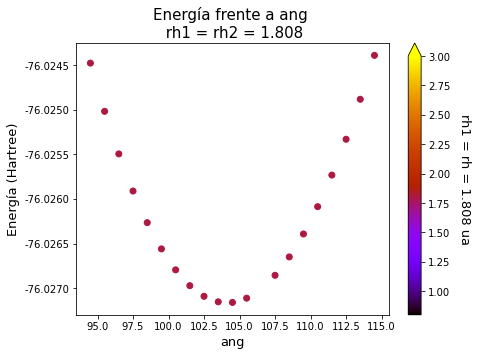

In [26]:
x_prueba = data0[(data0["rh1"]==1.808) & (data0["rh2"]==1.808) ].copy()

fig, ax = plt.subplots(figsize=(7,5))
colormap = plt.cm.gnuplot #or any other colormap
normalize = colors.Normalize(vmin=0.8, vmax=3.0)
pcm = ax.scatter(x_prueba['ang'], x_prueba['energia'],c=x_prueba['rh1'] , cmap=colormap, norm=normalize)

cbar = fig.colorbar(pcm, ax=ax, extend='max')
cbar.ax.set_ylabel('rh1 = rh = 1.808 ua',rotation=270,labelpad=20, fontsize=13)
ax.set_title('Energía frente a ang \n rh1 = rh2 = 1.808', fontsize=15)
ax.set_xlabel('ang', fontsize=13)
ax.set_ylabel('Energía (Hartree)', fontsize=13)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))


Ajuste de la gráfica anterior, auna parábola

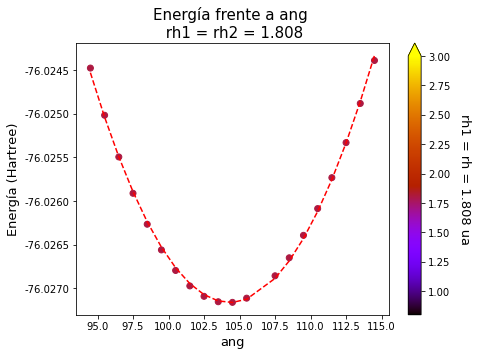

In [27]:
fig, ax = plt.subplots(figsize=(7,5))
colormap = plt.cm.gnuplot #or any other colormap
normalize = colors.Normalize(vmin=0.8, vmax=3.0)
pcm = ax.scatter(x_prueba['ang'], x_prueba['energia'],c=x_prueba['rh1'] , cmap=colormap, norm=normalize)
z = np.polyfit(x_prueba['ang'], x_prueba['energia'], 2)
p = np.poly1d(z)

cbar = fig.colorbar(pcm, ax=ax, extend='max')
cbar.ax.set_ylabel('rh1 = rh = 1.808 ua',rotation=270,labelpad=20, fontsize=13)
ax.set_title('Energía frente a ang \n rh1 = rh2 = 1.808' , fontsize=15)
ax.set_xlabel('ang', fontsize=13)
ax.set_ylabel('Energía (Hartree)', fontsize=13)
ax.yaxis.set_major_formatter(FormatStrFormatter('%.4f'))

plt.plot(x_prueba['ang'],p(x_prueba['ang']),"r--")
plt.show()

# Energía frente auna distancia de enlace y el ángulo. Se fija la otra distancia de enlace a 1.808 ua.
La  distancia que varía tambíen se codifica con el color

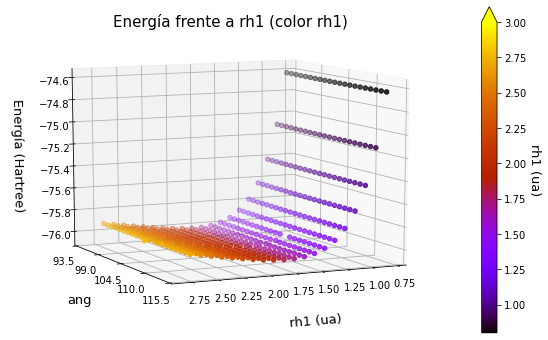

In [34]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
data_rh2_fijo = data[(np.round(data["rh2"],3)==1.808)].copy()

colormap = plt.cm.gnuplot 
normalize = colors.Normalize(vmin=0.8, vmax=3.0)

pcm = ax.scatter(data_rh2_fijo['rh1'], data_rh2_fijo['ang'], data_rh2_fijo['energia'],c=data_rh2_fijo['rh1'], cmap=colormap, norm=normalize)
cbar = fig.colorbar(pcm, ax=ax, extend='max')
cbar.ax.set_ylabel('rh1 (ua)', rotation=270, labelpad=15, fontsize=13)

ax.set_title('Energía frente a rh1 (color rh1)', fontsize=15)

ax.set_xlabel('rh1 (ua)', labelpad=20, fontsize=13)
ax.set_ylabel('ang', labelpad=15, fontsize=13)
ax.set_zlabel('Energía (Hartree)', labelpad=15, fontsize=13)

ax.yaxis.set_major_locator(LinearLocator(5))

ax.view_init(10, 65)

Anterior gráfica en 2D

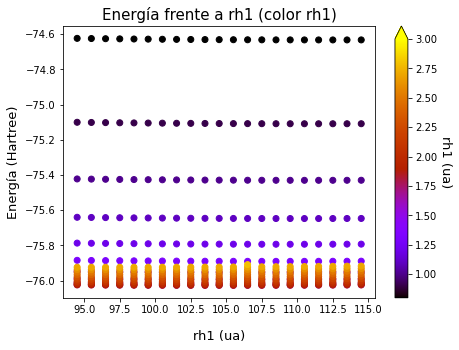

In [43]:
fig, ax = plt.subplots(figsize=(7,5))
colormap = plt.cm.gnuplot
normalize = colors.Normalize(vmin=0.8, vmax=3.0)
pcm = ax.scatter(data_rh2_fijo['ang'], data_rh2_fijo['energia'],c=data_rh2_fijo['rh1'] , cmap=colormap, norm=normalize)

cbar = fig.colorbar(pcm, ax=ax, extend='max')
cbar.ax.set_ylabel('rh1 (ua)',rotation=270,labelpad=15, fontsize=13)
ax.set_title('Energía frente a rh1 (color rh1)', fontsize=15)
ax.set_xlabel('rh1 (ua)', labelpad=15,fontsize=13)
ax.set_ylabel('Energía (Hartree)',labelpad=5, fontsize=13)
plt.show()

# Longitudes de enlace y ángulo en el mínimo de energía

In [45]:
indice_min_e =data['energia'].idxmin()
print('min E = ' + str(data['energia'][indice_min_e]))
print('rh1 (min E) = ' + str(data['rh1'][indice_min_e]))
print('rh2 (min E) = ' + str(data['rh2'][indice_min_e]))
print('ang (min E) = ' + str(data['ang'][indice_min_e]))

minimo= data['energia'][indice_min_e]

min E = -76.02716
rh1 (min E) = 1.808
rh2 (min E) = 1.808
ang (min E) = 104.5
